#ID0309 - Aprendizaje Estadístico

### Otoño 2023

### ID0309_Lab_2.5

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

# Agrupamiento jerárquico

En minería de datos, el [agrupamiento jerárquico](https://es.wikipedia.org/wiki/Agrupamiento_jer%C3%A1rquico) es un método de análisis de grupos puntuales, el cual busca construir una jerarquía de grupos. Estrategias para agrupamiento jerárquico generalmente caen en dos tipos:

* Aglomerativas: Este es un enfoque ascendente, cada observación comienza en su propio grupo, y los pares de grupos son mezclados mientras uno sube en la jerarquía.
* Divisivas: Este es un enfoque descendente, todas las observaciones comienzan en un grupo, y se realizan divisiones mientras uno baja en la jerarquía.

* En general, las mezclas y divisiones son determinadas con un [algoritmo voraz](https://es.wikipedia.org/wiki/Algoritmo_voraz).
* Los resultados del agrupamiento jerárquico son usualmente presentados en un **dendrograma**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In [ ]:
linkage_data = linkage(data, method='ward',
                       metric='euclidean')

In [ ]:
dendrogram(linkage_data)
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,
                  metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
print(labels)

[0 0 1 0 0 1 1 0 1 1]


In [ ]:
plt.scatter(x, y, c=labels)
plt.show()

In [ ]:
import pandas as pd
loan_data = \
pd.read_csv("/content/drive/MyDrive/Datasets/loan_data.csv")
loan_data.head()

In [ ]:
loan_data.info()

In [ ]:
percent_missing =round(100*(loan_data.isnull().sum())\
                       /len(loan_data),2)
percent_missing

In [ ]:
cleaned_data = loan_data.drop(['purpose', 'not.fully.paid'],
                              axis=1)
cleaned_data.info()

In [ ]:
import seaborn as sns

def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(cleaned_data)

In [ ]:
def remove_outliers(data):
  df = data.copy()
  for col in list(df.columns):

        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[str(col)] >= lower_bound) &

          (df[str(col)] <= upper_bound)]
  return df

In [ ]:
without_outliers = remove_outliers(cleaned_data)

In [ ]:
show_boxplot(without_outliers)

In [ ]:
without_outliers.shape

(9319, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

In [ ]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

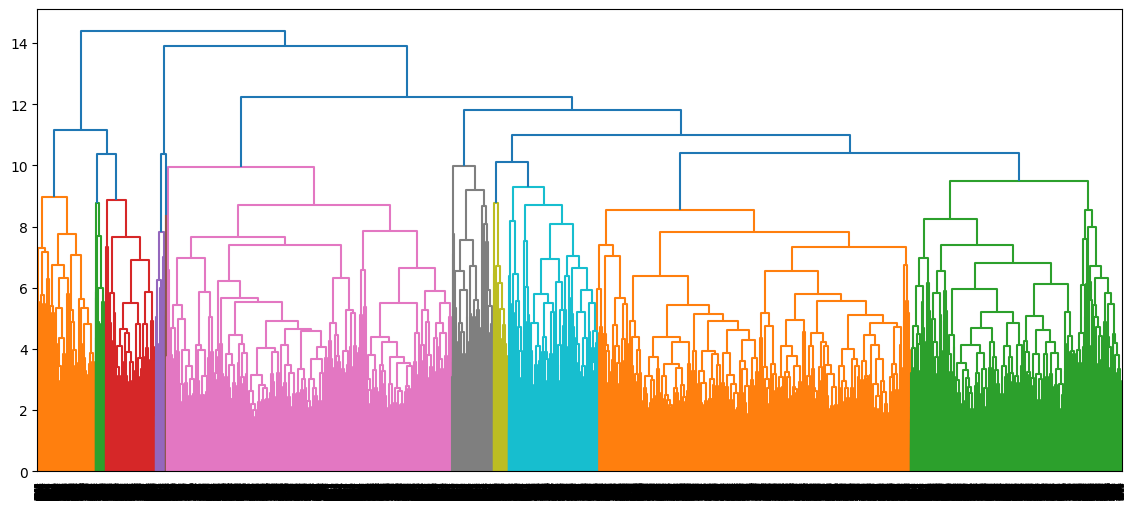

In [ ]:
dendrogram(complete_clustering)
plt.show()

In [ ]:
average_clustering = linkage(scaled_data, method="average", metric="euclidean")

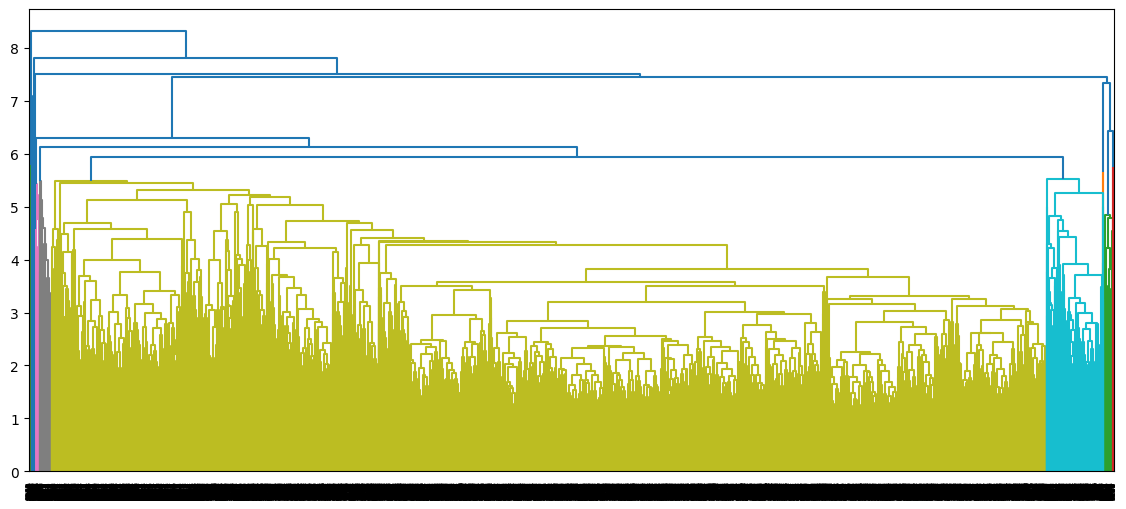

In [ ]:
dendrogram(average_clustering)
plt.show()

In [ ]:
median_clustering = linkage(scaled_data, method="median", metric="euclidean")

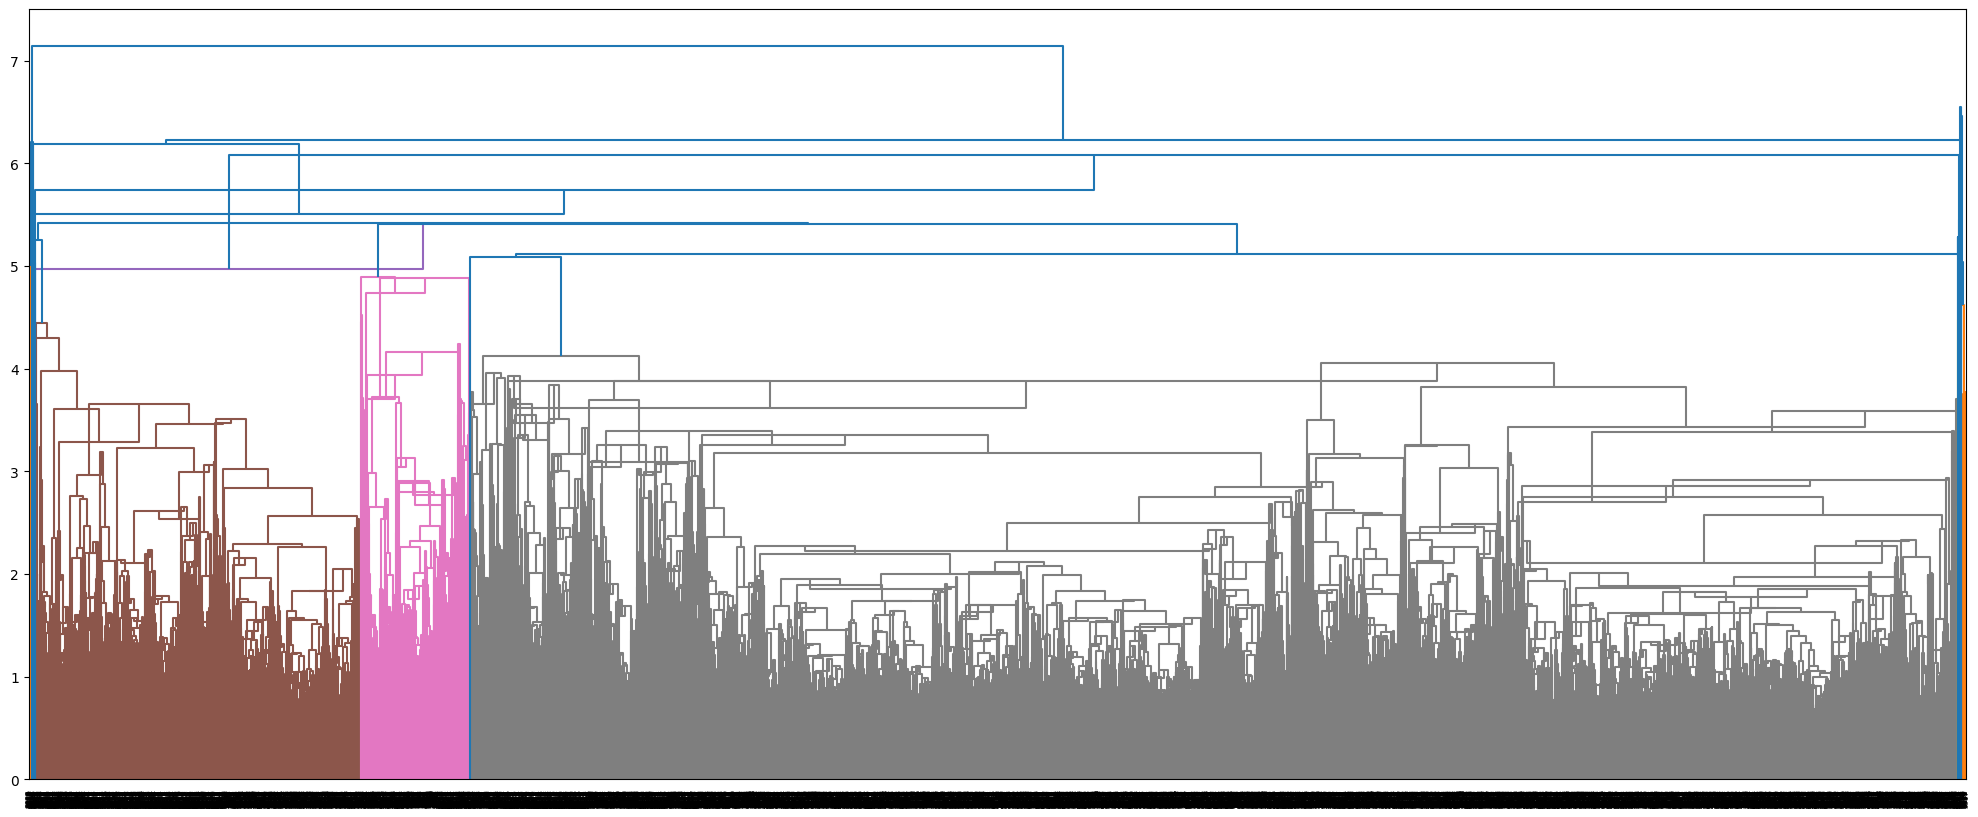

In [ ]:
fig = plt.figure(figsize=(25, 10))
dendrogram(median_clustering)
plt.show()

<Axes: xlabel='Cluster', ylabel='fico'>

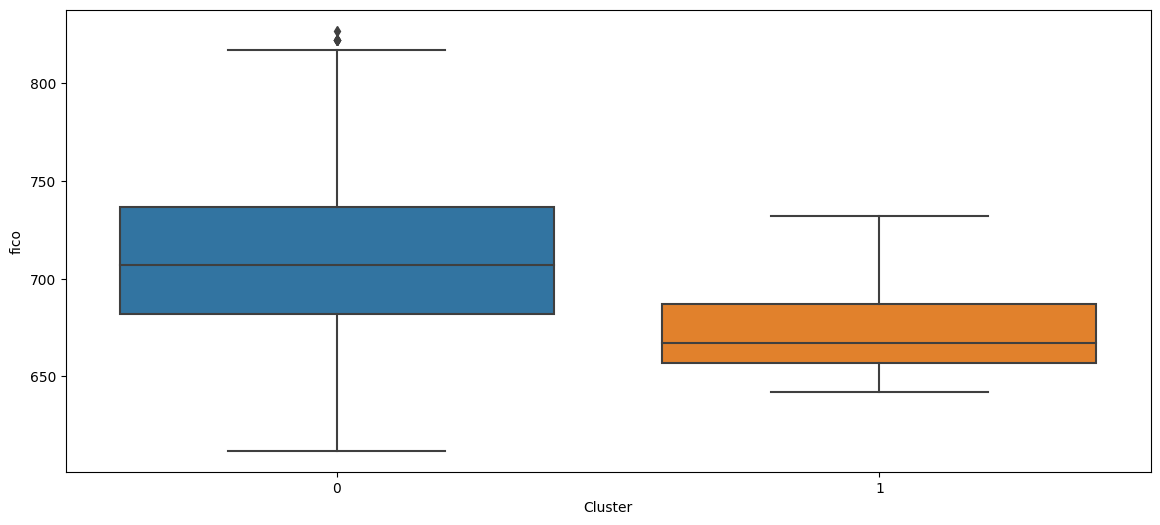

In [ ]:
from scipy import cluster
cluster_labels = cluster.hierarchy.cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)

In [ ]:
hierarchical_cluster2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labels = hierarchical_cluster2.fit_predict(scaled_data)
print(cluster_labels)

[0 0 0 ... 0 0 0]


In [ ]:
values, counts = np.unique(cluster_labels, return_counts=True)
print(values)
print(counts)

[0 1]
[6677 2642]


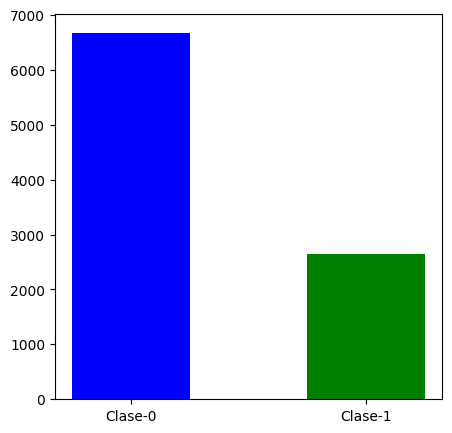

In [ ]:
fig = plt.figure(figsize = (5, 5))
plt.bar(['Clase-0','Clase-1'], counts, color = ['blue','green'], width = 0.5);